<a href="https://colab.research.google.com/github/lferrer1985/Estadistica/blob/main/edinson_nieto_luis_ferrer_trabajo_final_del_curso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

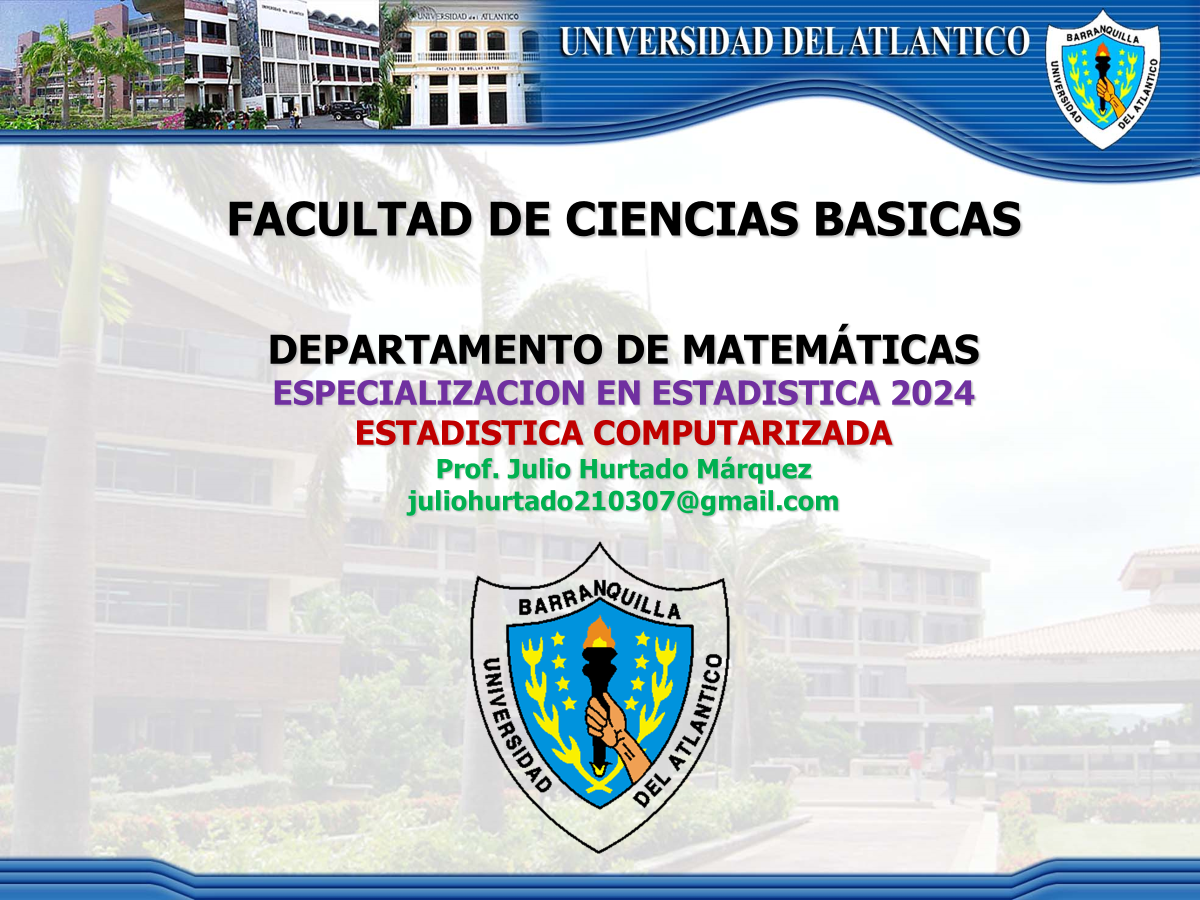

---


# **PROYECTO DEL CURSO ESTADÍSTICA COMPUTACIONAL**

# Elaborado por Licenciado Edinson Nieto Molinares Licenciado - Ingeniero Luis Miguel Ferrer Barrios
---

#**Incidencia de factores en el resultado del desempeño en el componente cuantitativo de los estudiantes de contaduria de una universidad privada en la ciudad de Barranquilla**




**Motivación:**
El presente trabajo surge como una acción  por parte de la universidad por mejorar el desempeño de los estudiantes del programa de contaduría pública en los resultados en las pruebas saber pro en el componente cuantitativo, en post de  buscar un mejor posicionamiento en la vecindad de comporación con las instituciones que ofrecen el mismo programa y ocupsn mejores posiciones en el ranking nacional.

**Objetivo General:**
Analizar la incidencia de algunos factores en el desempeño en el modulo cuantitativo de las pruebas saber pro de los estudiantes del programa de contaduría pública en una universidad privada de la ciudada de Barranquilla durante el periodos 2023.


**Objetivos específicos :**
+ 1.   Mostrar la distribución y medidas de tendencia central, dispersión y posición de las variables numericas: estu_semestrecursa, est_desc, est_inf, fund, mat_apli y mod_razona_cuantitat_punt para realizar conclusiones evidentes de la descripción estadistica.


+ 2. Realizar un analisis descriptivo de todas las variables cuantitativas mediante gráficos de boxplot, observar su distribución mediante histogramas y obtener las medidas de tendencia central, dispersión y posición para los datos individuales y datos agrupados para realizar conclusiones evidentes en los gráficos.


+ 3. Analizar relaciones bivariadas entre dos variables para establecer la influencia de unas variables sobre otras. Así: (a) Entre dos variables cualitativas, (b) Entre una variable cualitativa y una cuantitativa y (c) entre dos cuantitativas.




In [ ]:
# @title **1. Importando las Librerias que usaremos**
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import seaborn.objects as so
import statsmodels.api as sm

In [ ]:
# @title **2. Importamos los datos desde la BDCOCOMP.xlxs y lo asignamos a la variable df_datos**
df_datos = pd.read_excel("BDCP2.xlsx")  # Use read_excel for .xlsx files
df_datos

,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_TIENEETNIA,ESTU_MCPIO_RESIDE,ESTU_ESTADOCIVIL,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,...,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,EST_DESC,EST_INF,FUND,MAT_APLI,MOD_RAZONA_CUANTITAT_PUNT
0,F,2001-09-27,20232,No,BARRANQUILLA,Soltero,No,No,No,Si,...,140,43,55,3,2,4.00,4.00,4.00,4.20,129
1,M,1998-12-27,20232,No,BARRANQUILLA,Soltero,No,Si,No,Si,...,129,26,34,2,2,4.40,4.20,3.23,3.80,134
2,F,1998-03-07,20232,No,BARRANQUILLA,Soltero,No,Si,No,No,...,94,3,4,2,2,3.70,4.00,3.70,4.10,127
3,M,2001-02-14,20232,No,SOLEDAD,Soltero,No,Si,No,No,...,161,72,87,3,2,3.80,4.90,4.00,4.10,157
4,M,1992-04-09,20232,No,BARRANQUILLA,Soltero,Si,Si,No,Si,...,111,9,12,2,2,4.20,3.30,3.00,4.00,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,F,1988-12-14,20232,No,SOLEDAD,Unión libre,No,Si,No,No,...,131,29,38,2,2,4.40,4.10,4.40,4.10,123
78,F,2002-03-27,20232,No,BARRANQUILLA,Soltero,No,Si,No,No,...,162,74,88,2,2,4.20,4.70,4.30,4.10,169
79,F,1996-01-05,20232,No,BARRANQUILLA,Soltero,No,Si,Si,Si,...,134,33,43,3,2,3.80,4.00,3.70,4.00,146
80,F,1998-11-09,20232,No,BARRANQUILLA,Soltero,No,No,No,Si,...,122,18,23,3,2,4.50,4.00,3.80,3.90,91


In [ ]:
# @title **Mostrar información del tipo de las  variables**
Tipos_de_variables = df_datos.info()
print('Tipos de variables = ', Tipos_de_variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ESTU_GENERO                   82 non-null     object        
 1   ESTU_FECHANACIMIENTO          82 non-null     datetime64[ns]
 2   PERIODO                       82 non-null     int64         
 3   ESTU_TIENEETNIA               82 non-null     object        
 4   ESTU_MCPIO_RESIDE             82 non-null     object        
 5   ESTU_ESTADOCIVIL              82 non-null     object        
 6   ESTU_PAGOMATRICULABECA        82 non-null     object        
 7   ESTU_PAGOMATRICULACREDITO     82 non-null     object        
 8   ESTU_PAGOMATRICULAPADRES      82 non-null     object        
 9   ESTU_PAGOMATRICULAPROPIO      82 non-null     object        
 10  ESTU_COMOCAPACITOEXAMENSB11   82 non-null     object        
 11  ESTU_SEMESTRECURSA            82 n

In [ ]:
# @title **Cantidad de estudiantes y variables**
No_estudiantes_y_Variables = df_datos.shape
print('(No estudiantes, No Variables) = ',No_estudiantes_y_Variables)

(No estudiantes, No Variables) =  (82, 40)


In [ ]:
# @title **Convierte la variable ESTU_SEMESTRECURSA en una variable entera**
df_datos['ESTU_SEMESTRECURSA'] = pd.to_numeric(df_datos['ESTU_SEMESTRECURSA'], errors='coerce').astype(pd.Int64Dtype())
Tipos_de_variables = df_datos.info()
print('Tipos de variables = ', Tipos_de_variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ESTU_GENERO                   82 non-null     object        
 1   ESTU_FECHANACIMIENTO          82 non-null     datetime64[ns]
 2   PERIODO                       82 non-null     int64         
 3   ESTU_TIENEETNIA               82 non-null     object        
 4   ESTU_MCPIO_RESIDE             82 non-null     object        
 5   ESTU_ESTADOCIVIL              82 non-null     object        
 6   ESTU_PAGOMATRICULABECA        82 non-null     object        
 7   ESTU_PAGOMATRICULACREDITO     82 non-null     object        
 8   ESTU_PAGOMATRICULAPADRES      82 non-null     object        
 9   ESTU_PAGOMATRICULAPROPIO      82 non-null     object        
 10  ESTU_COMOCAPACITOEXAMENSB11   82 non-null     object        
 11  ESTU_SEMESTRECURSA            82 n

In [ ]:
# prompt: # @title **Mostrar información del tipo de las  variables y registros nulos (null)**

# @title **Mostrar información del tipo de las  variables y registros nulos (null)**
Tipos_de_variables = df_datos.info()
print('Tipos de variables = ', Tipos_de_variables)
# @title **Cantidad de estudiantes y variables**
No_estudiantes_y_Variables = df_datos.shape
print('(No estudiantes, No Variables) = ',No_estudiantes_y_Variables)

# @title **Mostrar registros nulos (null)**
registros_nulos = df_datos.isnull().sum()
print('Registros nulos por variable:\n', registros_nulos)
df_datos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ESTU_GENERO                   82 non-null     object        
 1   ESTU_FECHANACIMIENTO          82 non-null     datetime64[ns]
 2   PERIODO                       82 non-null     int64         
 3   ESTU_TIENEETNIA               82 non-null     object        
 4   ESTU_MCPIO_RESIDE             82 non-null     object        
 5   ESTU_ESTADOCIVIL              82 non-null     object        
 6   ESTU_PAGOMATRICULABECA        82 non-null     object        
 7   ESTU_PAGOMATRICULACREDITO     82 non-null     object        
 8   ESTU_PAGOMATRICULAPADRES      82 non-null     object        
 9   ESTU_PAGOMATRICULAPROPIO      82 non-null     object        
 10  ESTU_COMOCAPACITOEXAMENSB11   82 non-null     object        
 11  ESTU_SEMESTRECURSA            82 n

,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_TIENEETNIA,ESTU_MCPIO_RESIDE,ESTU_ESTADOCIVIL,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,...,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,EST_DESC,EST_INF,FUND,MAT_APLI,MOD_RAZONA_CUANTITAT_PUNT
0,F,2001-09-27,20232,No,BARRANQUILLA,Soltero,No,No,No,Si,...,140,43,55,3,2,4.00,4.00,4.00,4.20,129
1,M,1998-12-27,20232,No,BARRANQUILLA,Soltero,No,Si,No,Si,...,129,26,34,2,2,4.40,4.20,3.23,3.80,134
2,F,1998-03-07,20232,No,BARRANQUILLA,Soltero,No,Si,No,No,...,94,3,4,2,2,3.70,4.00,3.70,4.10,127
3,M,2001-02-14,20232,No,SOLEDAD,Soltero,No,Si,No,No,...,161,72,87,3,2,3.80,4.90,4.00,4.10,157
4,M,1992-04-09,20232,No,BARRANQUILLA,Soltero,Si,Si,No,Si,...,111,9,12,2,2,4.20,3.30,3.00,4.00,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,F,1988-12-14,20232,No,SOLEDAD,Unión libre,No,Si,No,No,...,131,29,38,2,2,4.40,4.10,4.40,4.10,123
78,F,2002-03-27,20232,No,BARRANQUILLA,Soltero,No,Si,No,No,...,162,74,88,2,2,4.20,4.70,4.30,4.10,169
79,F,1996-01-05,20232,No,BARRANQUILLA,Soltero,No,Si,Si,Si,...,134,33,43,3,2,3.80,4.00,3.70,4.00,146
80,F,1998-11-09,20232,No,BARRANQUILLA,Soltero,No,No,No,Si,...,122,18,23,3,2,4.50,4.00,3.80,3.90,91


In [ ]:
# prompt: hacer un promedio de la variable ESTU_SEMESTRECURSA  convertir el resultado en entero  y colocar el resultado en el registro nulo

# Calculate the mean of ESTU_SEMESTRECURSA, ignoring NaN values
mean_semestre = df_datos['ESTU_SEMESTRECURSA'].mean()

# Convert the mean to an integer
mean_semestre_int = int(mean_semestre)

# Fill NaN values in ESTU_SEMESTRECURSA with the integer mean
df_datos['ESTU_SEMESTRECURSA'].fillna(mean_semestre_int, inplace=True)

# Print the updated DataFrame
df_datos

<ipython-input-135-b86159c4fc7c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_datos['ESTU_SEMESTRECURSA'].fillna(mean_semestre_int, inplace=True)


,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_TIENEETNIA,ESTU_MCPIO_RESIDE,ESTU_ESTADOCIVIL,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,...,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,EST_DESC,EST_INF,FUND,MAT_APLI,MOD_RAZONA_CUANTITAT_PUNT
0,F,2001-09-27,20232,No,BARRANQUILLA,Soltero,No,No,No,Si,...,140,43,55,3,2,4.00,4.00,4.00,4.20,129
1,M,1998-12-27,20232,No,BARRANQUILLA,Soltero,No,Si,No,Si,...,129,26,34,2,2,4.40,4.20,3.23,3.80,134
2,F,1998-03-07,20232,No,BARRANQUILLA,Soltero,No,Si,No,No,...,94,3,4,2,2,3.70,4.00,3.70,4.10,127
3,M,2001-02-14,20232,No,SOLEDAD,Soltero,No,Si,No,No,...,161,72,87,3,2,3.80,4.90,4.00,4.10,157
4,M,1992-04-09,20232,No,BARRANQUILLA,Soltero,Si,Si,No,Si,...,111,9,12,2,2,4.20,3.30,3.00,4.00,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,F,1988-12-14,20232,No,SOLEDAD,Unión libre,No,Si,No,No,...,131,29,38,2,2,4.40,4.10,4.40,4.10,123
78,F,2002-03-27,20232,No,BARRANQUILLA,Soltero,No,Si,No,No,...,162,74,88,2,2,4.20,4.70,4.30,4.10,169
79,F,1996-01-05,20232,No,BARRANQUILLA,Soltero,No,Si,Si,Si,...,134,33,43,3,2,3.80,4.00,3.70,4.00,146
80,F,1998-11-09,20232,No,BARRANQUILLA,Soltero,No,No,No,Si,...,122,18,23,3,2,4.50,4.00,3.80,3.90,91


In [ ]:
# @title **Convierte la variable ESTU_SEMESTRECURSA nuevamente en una variable entera**
df_datos['ESTU_SEMESTRECURSA'] = pd.to_numeric(df_datos['ESTU_SEMESTRECURSA'], errors='coerce').astype(pd.Int64Dtype())
Tipos_de_variables = df_datos.info()
print('Tipos de variables = ', Tipos_de_variables)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ESTU_GENERO                   82 non-null     object        
 1   ESTU_FECHANACIMIENTO          82 non-null     datetime64[ns]
 2   PERIODO                       82 non-null     int64         
 3   ESTU_TIENEETNIA               82 non-null     object        
 4   ESTU_MCPIO_RESIDE             82 non-null     object        
 5   ESTU_ESTADOCIVIL              82 non-null     object        
 6   ESTU_PAGOMATRICULABECA        82 non-null     object        
 7   ESTU_PAGOMATRICULACREDITO     82 non-null     object        
 8   ESTU_PAGOMATRICULAPADRES      82 non-null     object        
 9   ESTU_PAGOMATRICULAPROPIO      82 non-null     object        
 10  ESTU_COMOCAPACITOEXAMENSB11   82 non-null     object        
 11  ESTU_SEMESTRECURSA            82 n

In [ ]:
# @title **Mostrar registros nulos (null)**
registros_nulos = df_datos.isnull().sum()
print('Registros nulos por variable:\n', registros_nulos)
df_datos

Registros nulos por variable:
 ESTU_GENERO                     0
ESTU_FECHANACIMIENTO            0
PERIODO                         0
ESTU_TIENEETNIA                 0
ESTU_MCPIO_RESIDE               0
ESTU_ESTADOCIVIL                0
ESTU_PAGOMATRICULABECA          0
ESTU_PAGOMATRICULACREDITO       0
ESTU_PAGOMATRICULAPADRES        0
ESTU_PAGOMATRICULAPROPIO        0
ESTU_COMOCAPACITOEXAMENSB11     0
ESTU_SEMESTRECURSA              0
FAMI_ESTRATOVIVIENDA            0
FAMI_TIENEINTERNET              0
FAMI_TIENECOMPUTADOR            0
FAMI_TIENESERVICIOTV            0
FAMI_TIENEAUTOMOVIL             0
FAMI_TIENEMOTOCICLETA           0
FAMI_TIENECONSOLAVIDEOJUEGOS    0
FAMI_TRABAJOLABORMADRE          0
ESTU_HORASSEMANATRABAJA         0
ESTU_PAGOMATRICULA              0
ESTU_VLRULTIMOSEMESCURSADO      0
ESTU_PRESENTACIONCASA           0
ESTU_PRGM_ACADEMICO             0
GRUPOREFERENCIA                 0
ESTU_NUCLEO_PREGRADO            0
MOD_RAZONA_CUANTITAT_DESEM      0
MOD_RAZONA_CUANTI

,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_TIENEETNIA,ESTU_MCPIO_RESIDE,ESTU_ESTADOCIVIL,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,...,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,EST_DESC,EST_INF,FUND,MAT_APLI,MOD_RAZONA_CUANTITAT_PUNT
0,F,2001-09-27,20232,No,BARRANQUILLA,Soltero,No,No,No,Si,...,140,43,55,3,2,4.00,4.00,4.00,4.20,129
1,M,1998-12-27,20232,No,BARRANQUILLA,Soltero,No,Si,No,Si,...,129,26,34,2,2,4.40,4.20,3.23,3.80,134
2,F,1998-03-07,20232,No,BARRANQUILLA,Soltero,No,Si,No,No,...,94,3,4,2,2,3.70,4.00,3.70,4.10,127
3,M,2001-02-14,20232,No,SOLEDAD,Soltero,No,Si,No,No,...,161,72,87,3,2,3.80,4.90,4.00,4.10,157
4,M,1992-04-09,20232,No,BARRANQUILLA,Soltero,Si,Si,No,Si,...,111,9,12,2,2,4.20,3.30,3.00,4.00,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,F,1988-12-14,20232,No,SOLEDAD,Unión libre,No,Si,No,No,...,131,29,38,2,2,4.40,4.10,4.40,4.10,123
78,F,2002-03-27,20232,No,BARRANQUILLA,Soltero,No,Si,No,No,...,162,74,88,2,2,4.20,4.70,4.30,4.10,169
79,F,1996-01-05,20232,No,BARRANQUILLA,Soltero,No,Si,Si,Si,...,134,33,43,3,2,3.80,4.00,3.70,4.00,146
80,F,1998-11-09,20232,No,BARRANQUILLA,Soltero,No,No,No,Si,...,122,18,23,3,2,4.50,4.00,3.80,3.90,91


In [ ]:
# @title **Verificar la cantidad de datos faltantes en cada columna**
faltantes = df_datos.isnull().sum()
faltantes

,0
ESTU_GENERO,0
ESTU_FECHANACIMIENTO,0
PERIODO,0
ESTU_TIENEETNIA,0
ESTU_MCPIO_RESIDE,0
ESTU_ESTADOCIVIL,0
ESTU_PAGOMATRICULABECA,0
ESTU_PAGOMATRICULACREDITO,0
ESTU_PAGOMATRICULAPADRES,0
ESTU_PAGOMATRICULAPROPIO,0


In [ ]:
# @title **Estadísticas para variables numéricas**
categ_stats = df_datos[['ESTU_SEMESTRECURSA', 'EST_DESC', 'EST_INF', 'FUND', 'MAT_APLI']].describe().round(2)

# Mostrar estadísticas descriptivas
categ_stats

,ESTU_SEMESTRECURSA,EST_DESC,EST_INF,FUND,MAT_APLI
count,82.00,82.00,82.00,82.00,82.00
mean,8.17,4.12,4.25,3.81,4.04
std,0.72,0.46,0.44,0.52,0.33
min,7.00,3.10,3.00,3.00,3.20
25%,8.00,3.80,4.00,3.30,3.88
50%,8.00,4.20,4.30,3.80,4.00
75%,9.00,4.47,4.50,4.20,4.20
max,10.00,4.90,5.00,4.90,4.80


In [ ]:
# @title **Estadísticas para variables categóricas**
categ_stats = df_datos[['FAMI_ESTRATOVIVIENDA', 'ESTU_HORASSEMANATRABAJA', 'ESTU_PAGOMATRICULA', 'ESTU_PRESENTACIONCASA']].describe()

# Mostrar estadísticas descriptivas
categ_stats

,FAMI_ESTRATOVIVIENDA,ESTU_HORASSEMANATRABAJA,ESTU_PAGOMATRICULA,ESTU_PRESENTACIONCASA
count,82,82,82,82
unique,4,5,4,2
top,Estrato 2,Más de 30 horas,Creditos,No
freq,32,47,51,71


In [ ]:
# @title **Hazme la cuenta de valores de la variable Horas que trabaja el estudiante a la semana que trabaja**
df_datos['ESTU_HORASSEMANATRABAJA'].value_counts()


,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,47
Entre 11 y 20 horas,11
Menos de 10 horas,9
Entre 21 y 30 horas,9
0,6


In [ ]:
# @title **Conteo de valores de la variable del pago de la matricula**
df_datos['ESTU_PAGOMATRICULA'].value_counts()


,count
ESTU_PAGOMATRICULA,
Creditos,51
Propios,13
Becas o Subsidios,10
Familiares,8


In [ ]:
# @title **Conteo de valores de la variable donde presento la prUeba  en casa**
df_datos['ESTU_PRESENTACIONCASA'].value_counts()



,count
ESTU_PRESENTACIONCASA,
No,71
Si,11


In [ ]:
# @title **Conteo de valores de la variable DESEMPEÑO EN MODULO DE RAZONAMIENTO CUANTITATIVO**
df_datos['MOD_RAZONA_CUANTITAT_DESEM'].value_counts()



,count
MOD_RAZONA_CUANTITAT_DESEM,
2,37
1,26
3,19


In [ ]:
# @title **Conteo de valores de la variable SEMESTRE que presenta la prueba**
df_datos['ESTU_SEMESTRECURSA'].value_counts()


,count
ESTU_SEMESTRECURSA,
8,44
9,23
7,13
10,2


# **Analisis Exploratorio Inicial** Una exploración inicial muestra que:

* Los datos corresponden a 82 estudiantes  con información de 39 caracteristicas


In [ ]:
df_datos.columns


Index(['ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_TIENEETNIA',
       'ESTU_MCPIO_RESIDE', 'ESTU_ESTADOCIVIL', 'ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'ESTU_COMOCAPACITOEXAMENSB11',
       'ESTU_SEMESTRECURSA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_TRABAJOLABORMADRE', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_PAGOMATRICULA', 'ESTU_VLRULTIMOSEMESCURSADO',
       'ESTU_PRESENTACIONCASA', 'ESTU_PRGM_ACADEMICO', 'GRUPOREFERENCIA',
       'ESTU_NUCLEO_PREGRADO', 'MOD_RAZONA_CUANTITAT_DESEM',
       'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_RAZONA_CUANTITATIVO_PNBC',
       'PUNT_GLOBAL', 'PERCENTIL_GLOBAL', 'PERCENTIL_NBC',
       'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_IES', 'EST_DESC', 'EST_INF', 'FUND',
       'MAT_APLI', 'MOD_RAZONA_CUANTITAT_P

* Los estudiantes se encuentran distribuidos en los siguientes estratos socioeconomicos:
 1, 2, 3 y 4

* Los estudiantes trabajan  las siguientes horas a la semana :
  0 H,
  menos 10 H,
  entre 11 y 20 H,
  entre 21 y 30 H,
  más de 30 H

* En la variable como paga sus estudios se encontraron que la variable tiene las siguientes respuestas:

  * credito
  * recursos propios
  * familia
  * becas o subsidios


  



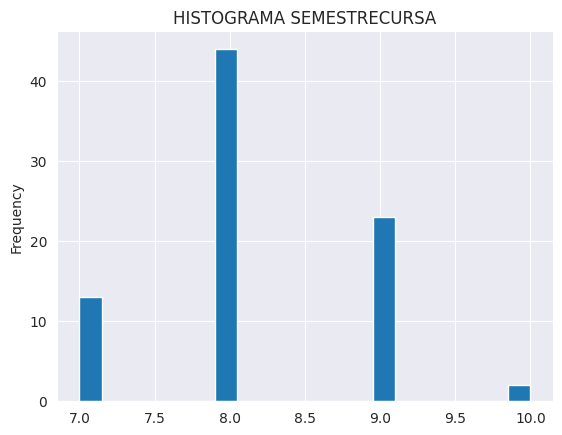

In [ ]:
# @title ESTU_SEMESTRECURSA

from matplotlib import pyplot as plt
df_datos['ESTU_SEMESTRECURSA'].plot(kind='hist', bins=20, title='HISTOGRAMA SEMESTRECURSA')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title **Cantidad de estudiantes y variables**
No_estudiantes_y_Variables = df_datos.shape
print('(No estudiantes, No Variables) = ',No_estudiantes_y_Variables)

(No estudiantes, No Variables) =  (82, 40)


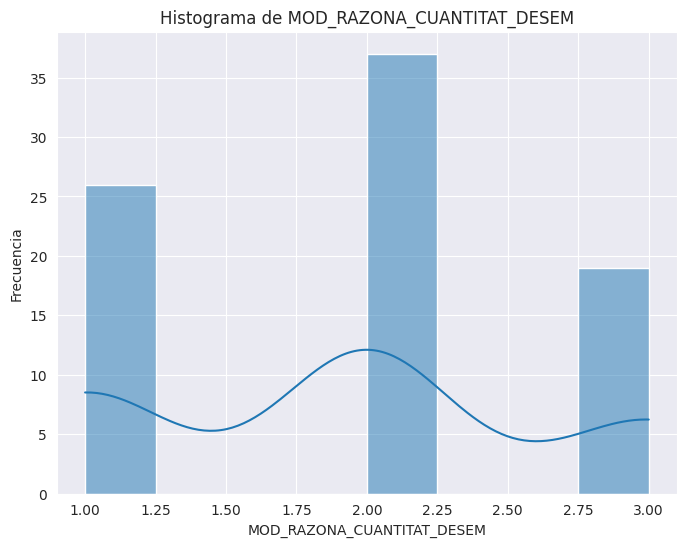

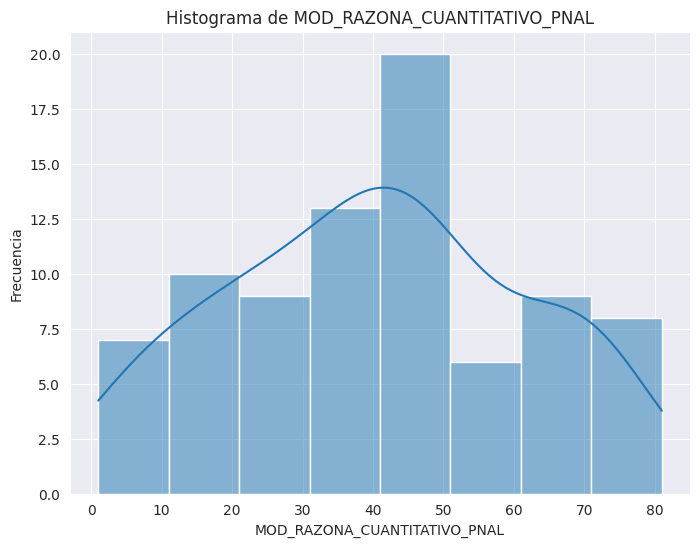

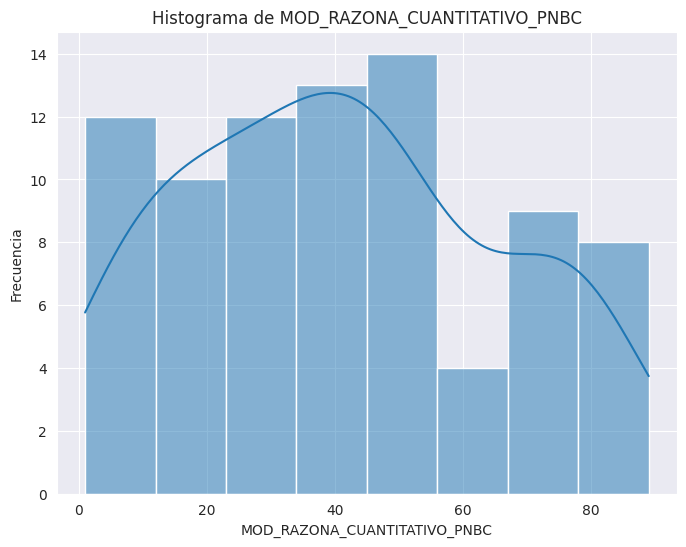

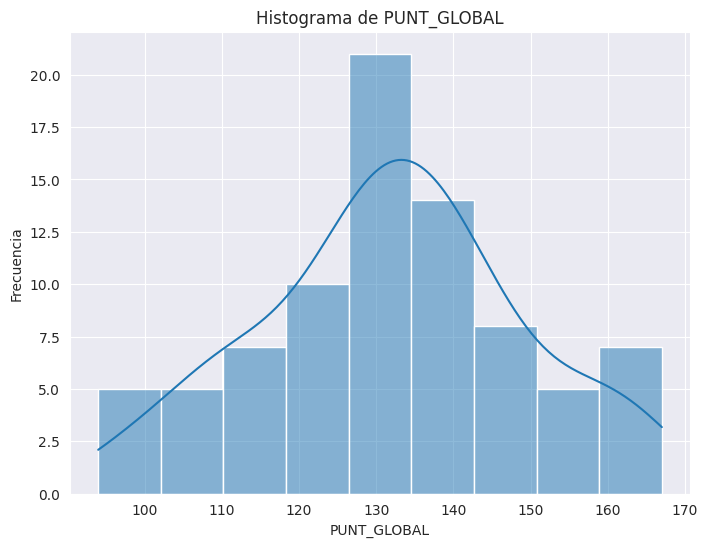

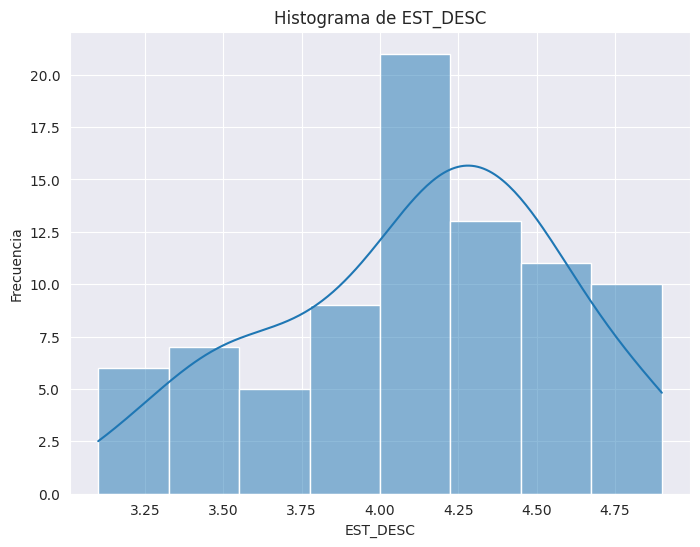

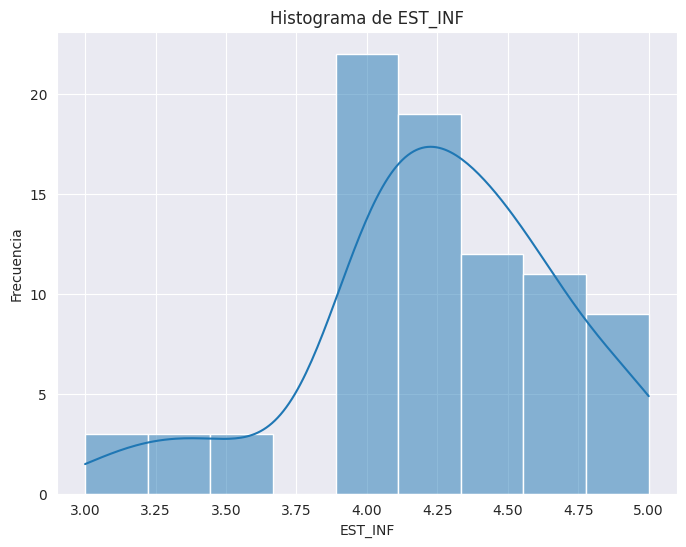

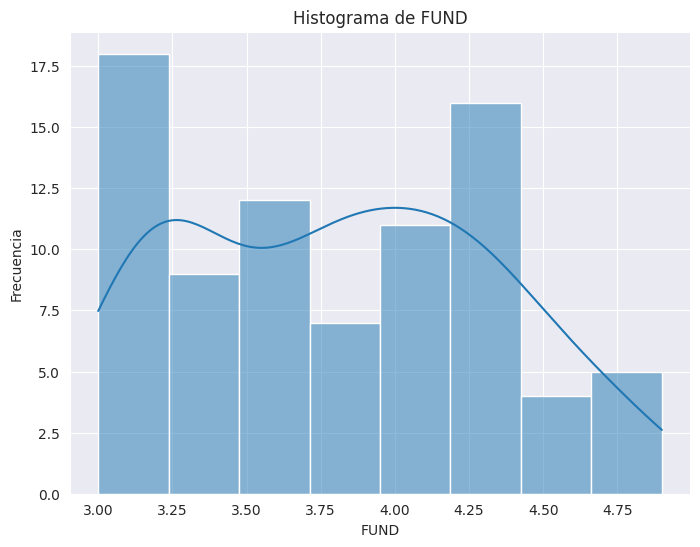

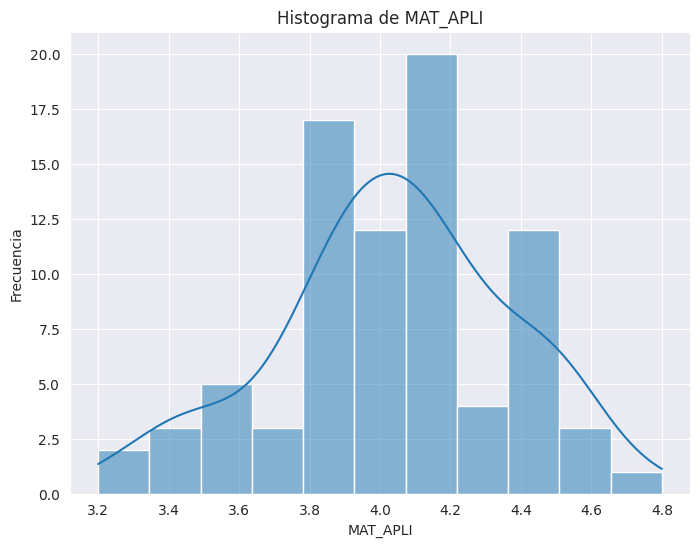

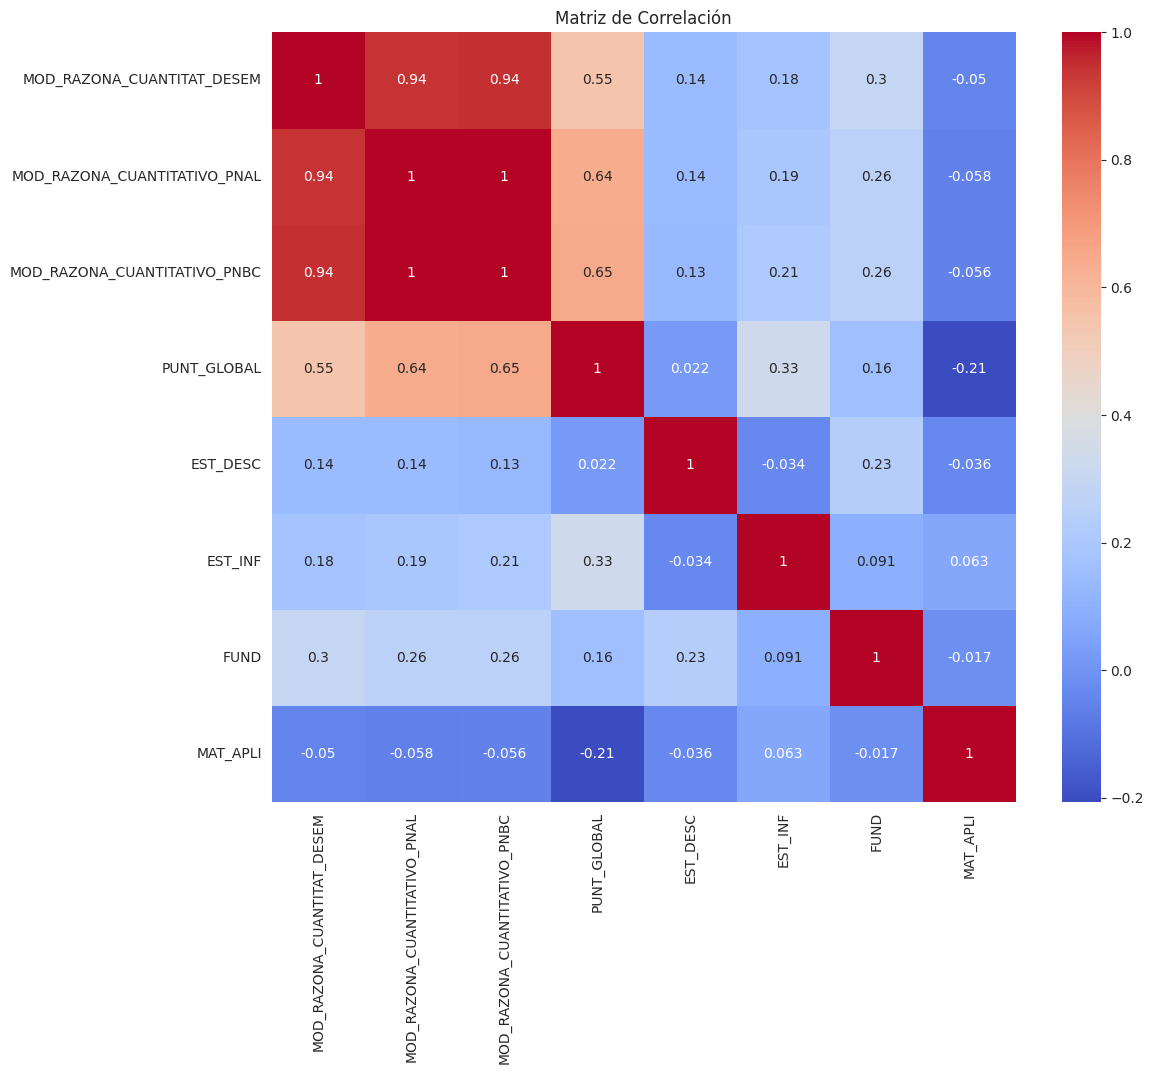

In [ ]:
# prompt: visualiza las variables MOD_RAZONA_CUANTITAT_PUNT, MOD_RAZONA_CUANTITAT_DESEM,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PNBC,PUNT_GLOBAL,EST DESC,EST INF,FUND,MAT APLI

# Selecciona las variables que deseas visualizar
variables_a_visualizar = ['MOD_RAZONA_CUANTITAT_DESEM',
                          'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_RAZONA_CUANTITATIVO_PNBC',
                          'PUNT_GLOBAL', 'EST_DESC', 'EST_INF', 'FUND', 'MAT_APLI']


# Crea un diagrama de pares para visualizar las relaciones entre las variables
#sns.pairplot(df_datos[variables_a_visualizar])
#plt.show()

# Crea histogramas para cada variable individual
for variable in variables_a_visualizar:
  plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si lo deseas
  sns.histplot(df_datos[variable], kde=True)
  plt.title(f'Histograma de {variable}')
  plt.xlabel(variable)
  plt.ylabel('Frecuencia')
  plt.show()


# Puedes crear matrices de correlación para visualizar la correlación entre las variables
correlation_matrix = df_datos[variables_a_visualizar].corr()
plt.figure(figsize=(12, 10))  # Ajusta el tamaño de la figura si lo deseas
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
# @title **4. En el caso de encontrar datos o caracteres extraños**
df_datos= df_datos.replace(np.nan, '0')

In [ ]:
df_datos.columns

Index(['ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_TIENEETNIA',
       'ESTU_MCPIO_RESIDE', 'ESTU_ESTADOCIVIL', 'ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'ESTU_COMOCAPACITOEXAMENSB11',
       'ESTU_SEMESTRECURSA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_TRABAJOLABORMADRE', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_PAGOMATRICULA', 'ESTU_VLRULTIMOSEMESCURSADO',
       'ESTU_PRESENTACIONCASA', 'ESTU_PRGM_ACADEMICO', 'GRUPOREFERENCIA',
       'ESTU_NUCLEO_PREGRADO', 'MOD_RAZONA_CUANTITAT_DESEM',
       'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_RAZONA_CUANTITATIVO_PNBC',
       'PUNT_GLOBAL', 'PERCENTIL_GLOBAL', 'PERCENTIL_NBC',
       'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_IES', 'EST_DESC', 'EST_INF', 'FUND',
       'MAT_APLI', 'MOD_RAZONA_CUANTITAT_P

In [ ]:
df_datos['FAMI_ESTRATOVIVIENDA'].head(20)

,FAMI_ESTRATOVIVIENDA
0,Estrato 3
1,Estrato 3
2,Estrato 3
3,Estrato 1
4,Estrato 3
5,Estrato 2
6,Estrato 2
7,Estrato 1
8,Estrato 3
9,Estrato 1


In [ ]:
# @title **Muestrame cuantos estudiantes son de Estrato 1**
df_datos['FAMI_ESTRATOVIVIENDA'].value_counts().get('Estrato 1', 0)

31

In [ ]:
# @title **Muestrame cuantos estudiantes son de estrato 2**
df_datos['FAMI_ESTRATOVIVIENDA'].value_counts().get('Estrato 2', 0)

32

In [ ]:
# @title **Muestrame cuantos estudiantes son de estrato 3**
df_datos['FAMI_ESTRATOVIVIENDA'].value_counts().get('Estrato 3', 0)

16

In [ ]:
# @title **Muestrame cuantos estudiantes son de estrato 4**
df_datos['FAMI_ESTRATOVIVIENDA'].value_counts().get('Estrato 4', 0)

3

In [ ]:
# @title **Muestrame cuantos estudiantes son de estrato 5**
df_datos['FAMI_ESTRATOVIVIENDA'].value_counts().get('Estrato 5', 0)

0

In [ ]:
# @title **Muestrame cuantos estudiantes son de estrato 6**
df_datos['FAMI_ESTRATOVIVIENDA'].value_counts().get('Estrato 6', 0)

0

In [ ]:
# @title **Hazme la cuenta de valores de la variable ESTRATO**
df_datos['FAMI_ESTRATOVIVIENDA'].value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,32
Estrato 1,31
Estrato 3,16
Estrato 4,3


In [ ]:
# @title **Conteo de los valores de la variable internet**
df_datos['FAMI_TIENEINTERNET'].value_counts()

,count
FAMI_TIENEINTERNET,
Si,72
No,10


In [ ]:
# @title **Conteo de los valores de la variable tiene computador**
df_datos['FAMI_TIENECOMPUTADOR'].value_counts()

,count
FAMI_TIENECOMPUTADOR,
Si,60
No,22


In [ ]:
# @title **Conteo de los valores de la variable número de horas a la semana que trabaja el estudiante**
df_datos['ESTU_HORASSEMANATRABAJA'].value_counts()


,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,47
Entre 11 y 20 horas,11
Menos de 10 horas,9
Entre 21 y 30 horas,9
0,6


In [ ]:
# @title **Hazme la cuenta de los valores de la variable como paga la matricula del semestre  del estudiante**
df_datos['ESTU_PAGOMATRICULA'].value_counts()


,count
ESTU_PAGOMATRICULA,
Creditos,51
Propios,13
Becas o Subsidios,10
Familiares,8


In [ ]:
# prompt: muestra los resultados  como una tabla

# Resumen estadísticas descriptivas generales como una tabla en mardowm
stats_descriptivas = df_datos.describe()
# Mostrar estadísticas descriptivas con dos decimales máximo
pd.options.display.float_format = '{:,.2f}'.format
print(stats_descriptivas.to_markdown())

|       | ESTU_FECHANACIMIENTO          |   PERIODO |   ESTU_SEMESTRECURSA |   MOD_RAZONA_CUANTITAT_DESEM |   MOD_RAZONA_CUANTITATIVO_PNAL |   MOD_RAZONA_CUANTITATIVO_PNBC |   PUNT_GLOBAL |   PERCENTIL_GLOBAL |   PERCENTIL_NBC |   ESTU_NSE_INDIVIDUAL |   ESTU_NSE_IES |   EST_DESC |   EST_INF |      FUND |   MAT_APLI |   MOD_RAZONA_CUANTITAT_PUNT |
|:------|:------------------------------|----------:|---------------------:|-----------------------------:|-------------------------------:|-------------------------------:|--------------:|-------------------:|----------------:|----------------------:|---------------:|-----------:|----------:|----------:|-----------:|----------------------------:|
| count | 82                            |        82 |            82        |                    82        |                        82      |                        82      |        82     |            82      |         82      |             82        |             82 |  82        | 82        | 82   

MSE: 257.16588273267575
RMSE: 16.036392447576098
MAE: 12.946737817296317
R^2: 0.06507484703570976
Coeficientes del modelo:
[ 4.5638975  10.1028674   9.98573635 -6.41836806]
Intercepto del modelo:
59.9014523156021


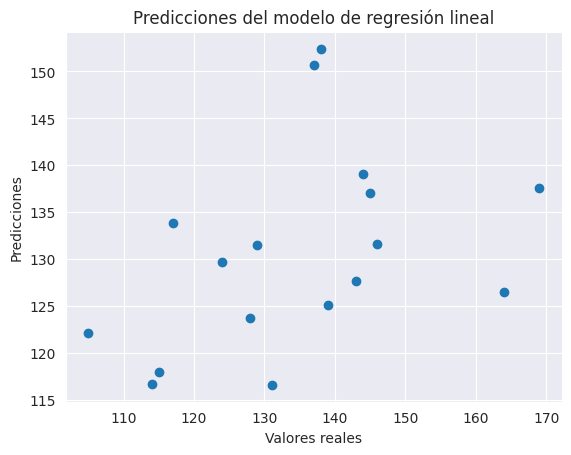

In [ ]:
# prompt: genera el modelo de regresion

# Define las variables independientes (X) y la variable dependiente (y)
X = df_datos[['EST_DESC', 'EST_INF', 'FUND', 'MAT_APLI']]
y = df_datos['MOD_RAZONA_CUANTITAT_PUNT']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrena el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

# Realiza predicciones con los datos de prueba
y_pred = modelo_regresion.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

# Imprime los coeficientes del modelo
print("Coeficientes del modelo:")
print(modelo_regresion.coef_)
print("Intercepto del modelo:")
print(modelo_regresion.intercept_)

# Puedes visualizar las predicciones contra los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones del modelo de regresión lineal")
plt.show()

In [ ]:
# @title **5. Redefinamos las variables que vamos a usar en la regresión**
MAT_APLI = df_datos['MAT_APLI'].values
EST_INF = df_datos['EST_INF'].values
EST_DESC =df_datos['EST_DESC'].values
FUND = df_datos['FUND'].values
MOD_RAZONA_CUANTITAT_PUNT = df_datos['MOD_RAZONA_CUANTITAT_PUNT'].values


In [ ]:
# prompt: en la base de datos BDCP2.xlsx que variables puedo usar en un modelo de regresión?

# Assuming you want to predict 'MOD_RAZONA_CUANTITAT_PUNT'
X = df_datos[['EST_DESC', 'EST_INF', 'FUND', 'MAT_APLI']]  # Replace with your chosen variables
y = df_datos['MOD_RAZONA_CUANTITAT_PUNT']


# ... Then you can proceed with splitting data and fitting a regression model

In [ ]:
# @title **6. Definimos las variables Dependientes y las Independientes**
X = np.array([MAT_APLI]).T # Elegimos una variable para la regresión (.T es para la transpuesta)

Y = np.array(MOD_RAZONA_CUANTITAT_PUNT) # Variable dependiente

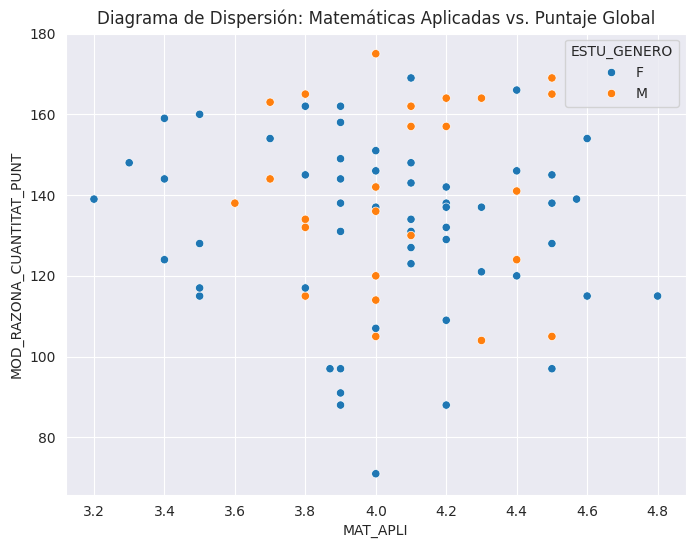

In [ ]:
# prompt: calcula el diagrama de dispersion de Matemáticas Aplicadas vs. Puntaje Global con diferenciado  en el sexo

# Crear el diagrama de dispersión con diferenciación por sexo
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MAT_APLI', y='MOD_RAZONA_CUANTITAT_PUNT', hue='ESTU_GENERO', data=df_datos)
plt.title('Diagrama de Dispersión: Matemáticas Aplicadas vs. Puntaje Global')
plt.xlabel('MAT_APLI')
plt.ylabel('MOD_RAZONA_CUANTITAT_PUNT')
plt.show()

In [ ]:
# @title **7. Definimos el Modelo de Regresión Lineal**
reg = LinearRegression() # Parte del Modelo
reg2 = reg.fit(X,Y) # Ajustar el modelo
Y_pred = reg2.predict(X) # Predicción del odelo
error = np.sqrt(mean_squared_error(Y,Y_pred)) , # Error cuadratico medio
R_2 = reg2.score(X,Y)


In [ ]:
# @title **8. Los resultados del Modelo**



# Calculamos RMSE o sea el error cuadratico medio
rmse = np.sqrt(mean_squared_error(Y, Y_pred))

# Calculamos la bondad de ajuste del modelo R^2
R_squared = r2_score(Y, Y_pred)

# Calculamos los coeficientes de correlación de Pearson
r = np.corrcoef(Y, Y_pred)[0, 1]

print(f"El error cuadrático medio es RMSE = {rmse:.4f}")
print(f"La bondad de ajuste o coeficiente de Determinación R^2: {R_squared*100:.2f}%")
print(f"Coeficiente de correlación de Pearson es r = {r:.2f}")

El error cuadrático medio es RMSE = 21.9643
La bondad de ajuste o coeficiente de Determinación R^2: 0.31%
Coeficiente de correlación de Pearson es r = 0.06




Este código en Python realiza un análisis estadístico y de regresión lineal sobre datos de estudiantes de contaduría de una universidad privada en Barranquilla. Vamos a desglosar las diferentes partes:

**1. Importación de librerías:** Se importan librerías como pandas (para manejo de datos), numpy (para operaciones numéricas), seaborn y matplotlib (para visualización), sklearn (para modelos de aprendizaje automático) y statsmodels (para análisis estadístico).

**2. Importación de datos:** Se lee un archivo Excel llamado "BDCP2.xlsx" que contiene la información de los estudiantes y se almacena en un DataFrame llamado `df_datos`.

**3. Análisis exploratorio:**
   - Se muestra información básica sobre los datos, como el tipo de variable y la cantidad de estudiantes y variables.
   - Se analizan valores nulos y se rellenan con la media de la variable "ESTU_SEMESTRECURSA".
   - Se calculan estadísticas descriptivas para variables numéricas y categóricas.
   - Se realizan conteos de valores para variables como "ESTU_HORASSEMANATRABAJA", "ESTU_PAGOMATRICULA", "ESTU_PRESENTACIONCASA", etc.
   - Se generan histogramas, diagramas de pares y matrices de correlación para visualizar la distribución y las relaciones entre las variables.

**4. Limpieza de datos:** Se reemplazan los valores nulos por '0'.

**5. Análisis de regresión:**
   - Se definen las variables independientes (X) y la variable dependiente (y) para el modelo de regresión lineal.
   - Se divide el conjunto de datos en entrenamiento y prueba.
   - Se crea un modelo de regresión lineal y se entrena con los datos de entrenamiento.
   - Se realizan predicciones con los datos de prueba y se evalúa el rendimiento del modelo usando métricas como MSE, RMSE, MAE y R^2.
   - Se imprimen los coeficientes e intercepto del modelo.

**6. Redefinición de variables para la regresión:** Se seleccionan las variables "MAT_APLI", "EST_INF", "EST_DESC", "FUND" y "PUNT_GLOBAL" para el análisis de regresión.

**7. Definición del modelo de regresión lineal:** Se crea un objeto `LinearRegression` y se ajusta el modelo con las variables independientes (X) y la variable dependiente (Y). Se calcula la predicción Y_pred y el error cuadrático medio (RMSE).

**8. Resultados del modelo:** Se imprimen los resultados del modelo, incluyendo el error cuadrático medio (RMSE), el coeficiente de determinación (R^2) y el coeficiente de correlación de Pearson (r).


En resumen, el código realiza un análisis exhaustivo de los datos de los estudiantes, incluyendo estadísticas descriptivas, exploración visual y un modelo de regresión lineal para analizar la incidencia de ciertos factores en el desempeño de los estudiantes en las pruebas Saber Pro.





In [ ]:
# @title **9. La recta de regresion estimada**

# Obtenmos los coeficientes del Modelo de regresión:  la pendiente (coeficiente de regresión) y la intersección (ordenada al origen)

pendiente = reg.coef_[0]
intercepto = reg.intercept_

# Imprime la ecuación de la recta de regresión
print(f"La recta de regresión estimada es: Y = {pendiente:.2f}X + {intercepto:.2f}")

La recta de regresión estimada es: Y = -3.68X + 149.50


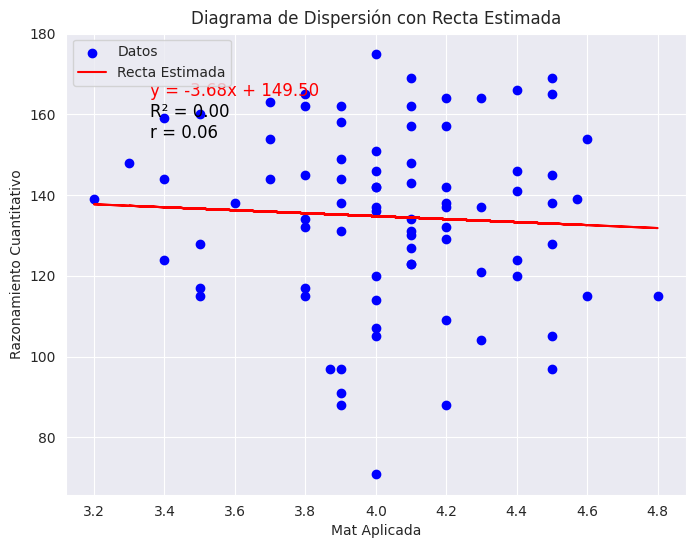

In [ ]:
# @title **10. Diagrama de Dispersión con Recta Estimada**

# Crear el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos')

# Dibujar la recta estimada
plt.plot(X, Y_pred, color='red', label='Recta Estimada')

# Añadir la ecuación de la recta estimada
# y = mx + b, donde m es la pendiente y b es la intersección con el eje y
m = reg.coef_[0]
b = reg.intercept_
ecuacion = f'y = {m:.2f}x + {b:.2f}'
plt.text(min(X) + 0.1*(max(X)-min(X)), max(Y)-0.1*(max(Y)-min(Y)), ecuacion, fontsize=12, color='red')

# Añadir el valor de R^2 y r en el diagrama
plt.text(min(X) + 0.1*(max(X)-min(X)), max(Y)-0.15*(max(Y)-min(Y)), f'R² = {R_squared:.2f}', fontsize=12, color='black')
plt.text(min(X) + 0.1*(max(X)-min(X)), max(Y)-0.20*(max(Y)-min(Y)), f'r = {r:.2f}', fontsize=12, color='black')

# Etiquetas de los ejes y título
plt.xlabel('Mat Aplicada')
plt.ylabel('Razonamiento Cuantitativo')
plt.title('Diagrama de Dispersión con Recta Estimada')
plt.legend()
plt.show()

In [ ]:
# @title **11. Realizar una predicción para el Razonamiento Cuantitativo**

MAT_APLI = 5

prediction = reg2.predict([[MAT_APLI]])[0]
print(f'La predicción del Razonamiento Cuantitativo para Mat aplicada  Y({MAT_APLI}) = {prediction:.2f}')

La predicción del Razonamiento Cuantitativo para Mat aplicada  Y(5) = 131.09


In [ ]:
X = 1
Y_pred = reg2.predict([[X]])[0]
print(f'La predicción del Puntaje Rendimiento Razonamiento Cuantitativo para la Mat Aplicada  Y({X}) = {Y_pred:.2f}')



La predicción del Puntaje Rendimiento Razonamiento Cuantitativo para la Mat Aplicada  Y(1) = 145.82


In [ ]:
# @title **12. Regresión Lineal Multiple con tres variables Independientes**
X2 = np.array([FUND, EST_DESC, EST_INF]).T # Elegimos una variable para la regresión (.T es para la transpuesta)
Y2 = np.array(MOD_RAZONA_CUANTITAT_PUNT) # Variable dependiente

In [ ]:
# @title **13. Definimos el Modelo de Regresión Lineal Nuevo**
reg = LinearRegression() # Parte del Modelo
reg = reg2.fit(X2,Y2) # Ajustar el modelo
Y_pred = reg2.predict(X2) # Predicción del modelo
error = np.sqrt(mean_squared_error(Y2,Y_pred)) , # Error cuadratico medio
R_2 = reg2.score(X2,Y2)

In [ ]:
# @title **14. Los resultados del Modelo**

# Calculamos RMSE o sea el error cuadratico medio
rmse2 = np.sqrt(mean_squared_error(Y2, Y_pred))

# Calculamos la bondad de ajuste del modelo R^2
R_squared2 = r2_score(Y2, Y_pred)

# Calculamos los coeficientes de correlación de Pearson
r = np.corrcoef(Y2, Y_pred)[0, 1]

print(f"El error cuadrático medio es RMSE = {rmse2:.4f}")
print(f"La bondad de ajuste o coeficiente de Determinación R^2: {R_squared2*100:.2f}%")
print(f"Coeficiente de correlación de Pearson es r = {r:.2f}")

El error cuadrático medio es RMSE = 20.9703
La bondad de ajuste o coeficiente de Determinación R^2: 9.13%
Coeficiente de correlación de Pearson es r = 0.30


In [ ]:
X2 = np.array([EST_DESC, EST_INF, FUND]).T # Elegimos las variables para la regresión (.T es para la transpuesta)
Y2 = np.array(MOD_RAZONA_CUANTITAT_PUNT) # Variable dependiente

In [ ]:
# @title **15. Los coeficientes del Modelo y la recta de regresion estimada**

intercepto = reg.intercept_
coef_1 = reg.coef_[0]
coef_2 = reg.coef_[1]
coef_3 = reg.coef_[2]

# imprime los coeficintes del Modelo de Regresión
print(f"Intercepto: {intercepto:.2f}")
print(f"Coeficiente 1: {coef_1:.2f}")
print(f"Coeficiente 2: {coef_2:.2f}")
print(f"Coeficiente 3: {coef_3:.2f}")

# Imprime la ecuación de la recta de regresión
print(f"La recta de regresión estimada es: Y = {coef_1:.2f}X1 + {coef_2:.2f}X2 + {coef_3:.2f}X3 + {intercepto:.2f}")


Intercepto: 50.27
Coeficiente 1: 9.20
Coeficiente 2: 4.33
Coeficiente 3: 7.40
La recta de regresión estimada es: Y = 9.20X1 + 4.33X2 + 7.40X3 + 50.27


In [ ]:
reg2.coef_

array([9.2003517 , 4.3264819 , 7.40087989])

In [ ]:
# @title **15. Los coeficientes del Modelo y la recta de regresion estimada de una forma mas elegante**

# Obtén los coeficientes del modelo de regresión Múltiple
coeficientes = reg.coef_
intercepto = reg.intercept_

# Imprime los coeficientes
print("Coeficientes del modelo reg:")
for i, coef in enumerate(coeficientes):
  print(f"Coeficiente de la variable X{i+1}: {coef:.2f}")
print(f"Intercepto: {intercepto:.2f}")

# Ecuación de la recta del modelo de regresión Múltiple
print("\nEcuación de la recta de regresión:")
Ecuacion = "Y2 = "
for i, coef in enumerate(coeficientes):
  Ecuacion += f"{coef:.2f} * X{i+1} + "
Ecuacion += f"{intercepto:.2f}"
Ecuacion

Coeficientes del modelo reg:
Coeficiente de la variable X1: 9.20
Coeficiente de la variable X2: 4.33
Coeficiente de la variable X3: 7.40
Intercepto: 50.27

Ecuación de la recta de regresión:


'Y2 = 9.20 * X1 + 4.33 * X2 + 7.40 * X3 + 50.27'

In [ ]:
# @title **16. Otras métricas del modelo de Regresión Multiple**
print(f'Error Medio Absoluto - MAE = {mean_absolute_error(Y2,Y_pred):.3f}' )
print(f"Cuadrado Medio del error - MSE = {mean_squared_error(Y2,Y_pred):.3f}")
print(f"Desviación Cuadrática Media - RMSE = {np.sqrt(mean_squared_error(Y2,Y_pred)):.3f}")
r2 = r2_score(Y2,Y_pred)
print(f'R cuadrado - Model Score: R2 = {r2*100:.2f}%')

Error Medio Absoluto - MAE = 17.097
Cuadrado Medio del error - MSE = 439.755
Desviación Cuadrática Media - RMSE = 20.970
R cuadrado - Model Score: R2 = 9.13%


In [ ]:
# @title **17. Realizar una predicción para el Puntaje Global**
FUND = 3
EST_DESC = 3
EST_INF = 3
'''FUND = 5
EST_DESC = 5
EST_INF = 5'''


prediccion = reg.predict([[FUND, EST_DESC,EST_INF]])[0]

print(f'La predicción del Puntaje global para FUND, EST_DESC Y EST_INF  Y{FUND, EST_DESC,EST_INF} = {prediccion:.2f}')

La predicción del Puntaje global para FUND, EST_DESC Y EST_INF  Y(3, 3, 3) = 113.05


In [ ]:
df_datos.columns

Index(['ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_TIENEETNIA',
       'ESTU_MCPIO_RESIDE', 'ESTU_ESTADOCIVIL', 'ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'ESTU_COMOCAPACITOEXAMENSB11',
       'ESTU_SEMESTRECURSA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_TRABAJOLABORMADRE', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_PAGOMATRICULA', 'ESTU_VLRULTIMOSEMESCURSADO',
       'ESTU_PRESENTACIONCASA', 'ESTU_PRGM_ACADEMICO', 'GRUPOREFERENCIA',
       'ESTU_NUCLEO_PREGRADO', 'MOD_RAZONA_CUANTITAT_DESEM',
       'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_RAZONA_CUANTITATIVO_PNBC',
       'PUNT_GLOBAL', 'PERCENTIL_GLOBAL', 'PERCENTIL_NBC',
       'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_IES', 'EST_DESC', 'EST_INF', 'FUND',
       'MAT_APLI', 'MOD_RAZONA_CUANTITAT_P

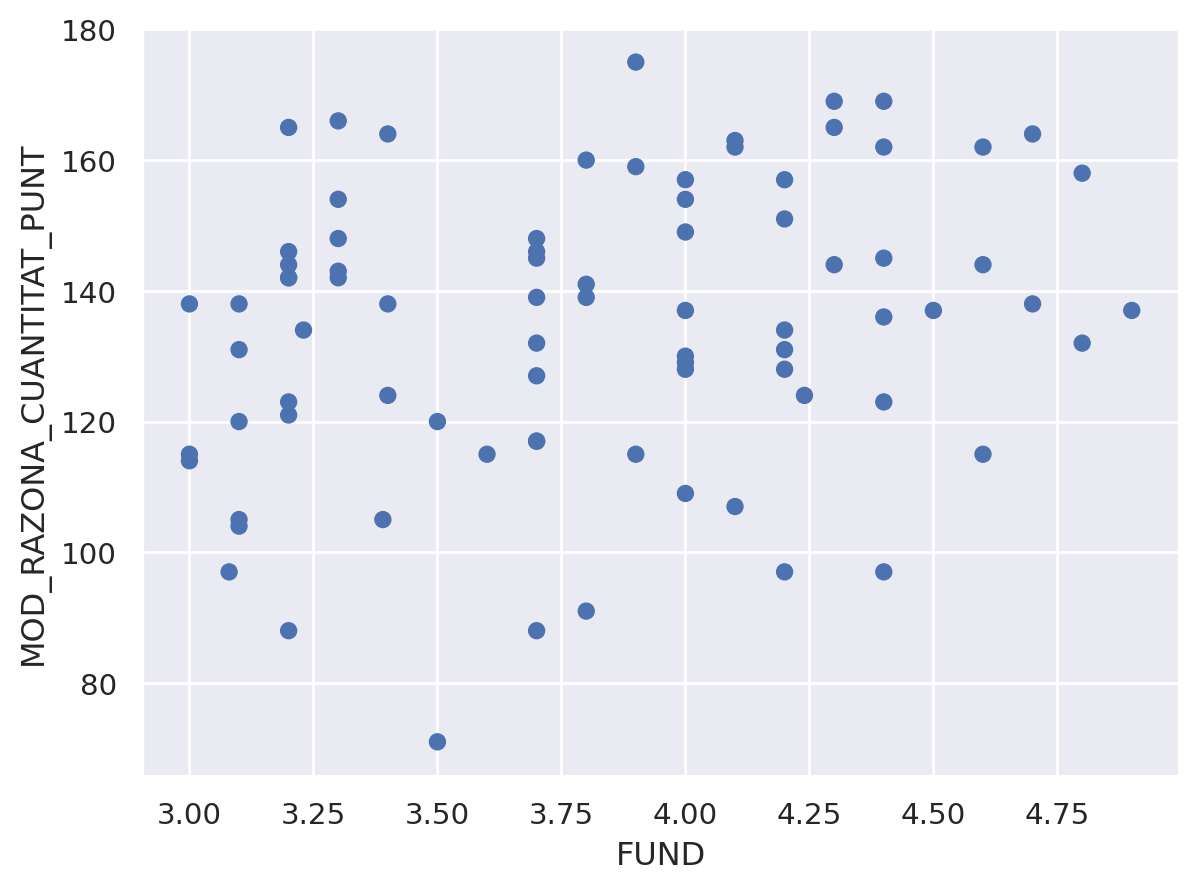

In [ ]:
# @title **18. Mas sobre Regresión Lineal - Gráfico de Dispersión "FUND vs PUNTAJE RAZONAMIENTO CUANTITATIVO"**
p = so.Plot(df_datos, "FUND", "MOD_RAZONA_CUANTITAT_PUNT").add(so.Dot())
p

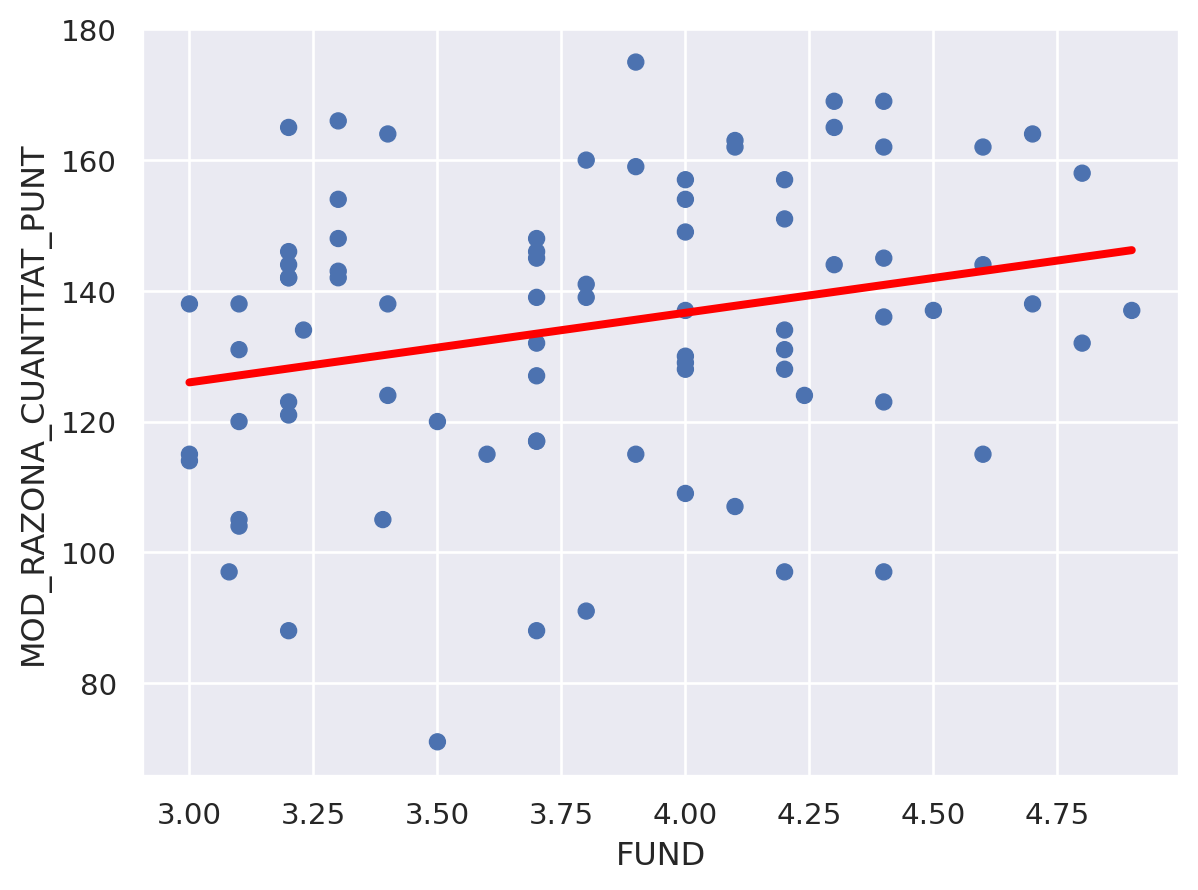

In [ ]:
# @title **19. Gráfico de Dispersión y recta de estimación**
p.add(so.Line(color="red", linewidth=3), so.PolyFit(1))

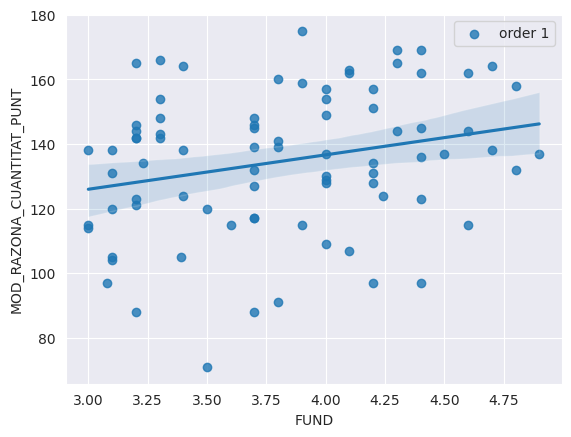

In [ ]:
# @title **20. Gráfico de Dispersión  usando _sns.regplot_**

sns.regplot(x="FUND", y="MOD_RAZONA_CUANTITAT_PUNT", scatter=True, order=1, data=df_datos, label="order 1")
plt.legend(loc="upper right")

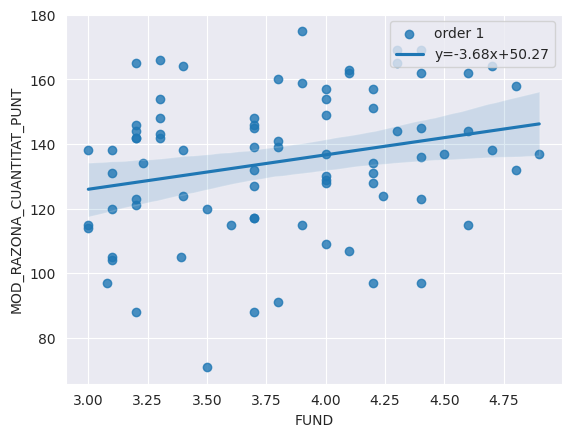

In [ ]:
# @title **21 Gráfico de Dispersión usando _sns.regplot_ y la recta de regresión**
sns.regplot(x="FUND", y="MOD_RAZONA_CUANTITAT_PUNT", scatter=True, order=1, data=df_datos, label="order 1", line_kws={'label':"y={0:.2f}x+{1:.2f}".format(pendiente, intercepto)})
plt.legend(loc="upper right")

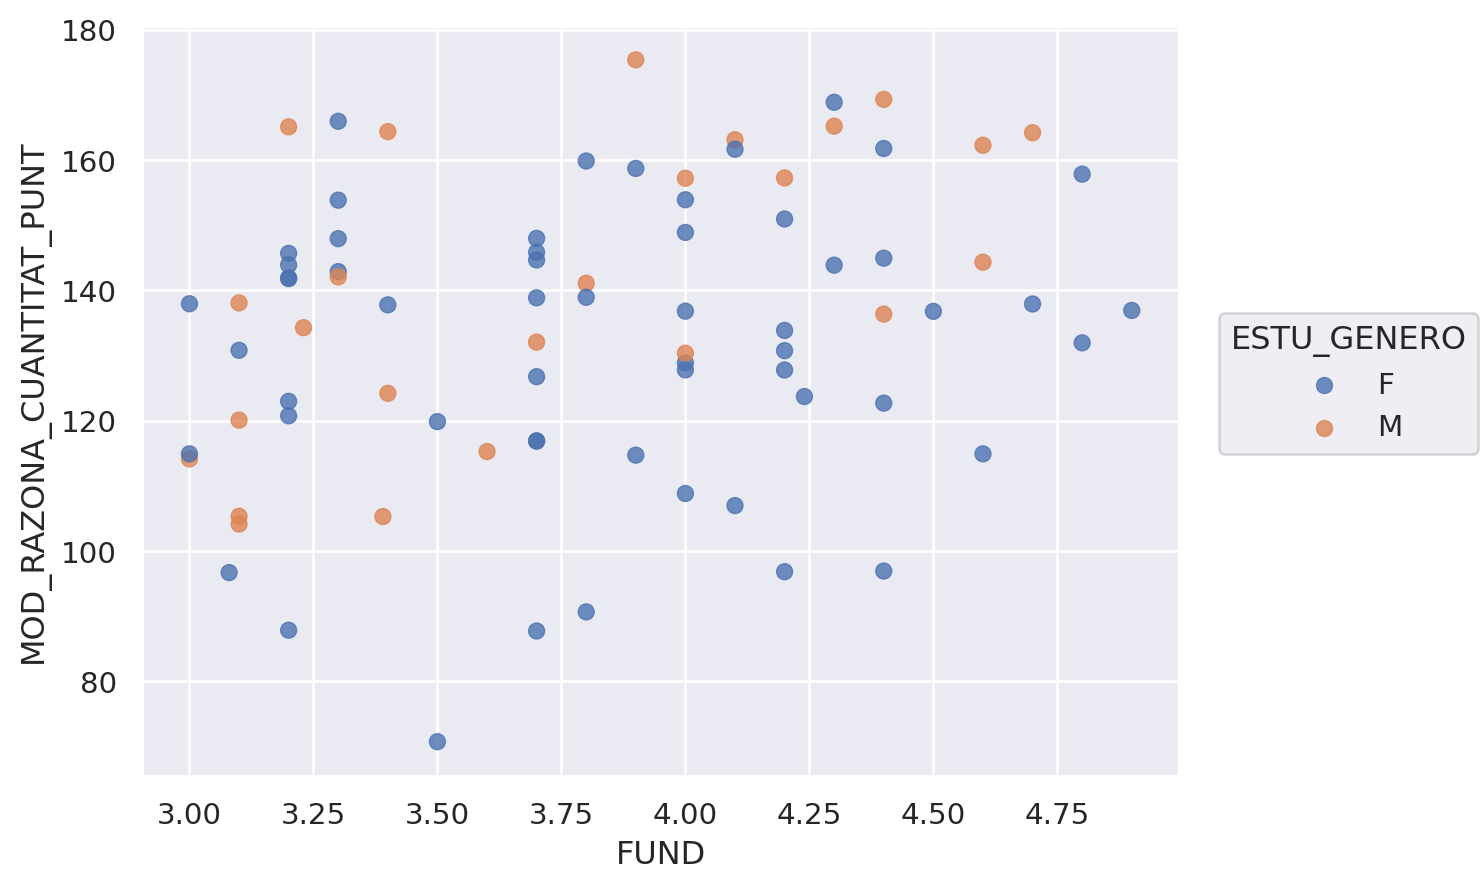

In [ ]:
# @title **22.  Gráfico de Dispersión de las tres variables cuantitativas relacionadas FUND vs MOD_RAZONA_CUANTITAT_PUNT vs GENERO**
so.Plot(df_datos, x="FUND", y="MOD_RAZONA_CUANTITAT_PUNT", color="ESTU_GENERO").add(so.Dot(alpha=.8), so.Dodge(), so.Jitter(.8), orient="y")


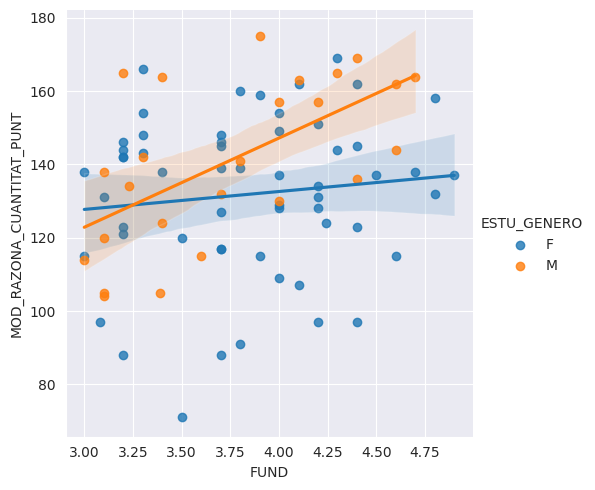

In [ ]:
# @title **23.  Gráfico de Dispersión - "FUND vs MOD_RAZONA_CUANTITAT_PUNT" vs "GENERO" y sus rectas**
sns.lmplot(x="FUND", y="MOD_RAZONA_CUANTITAT_PUNT", hue="ESTU_GENERO", data=df_datos)

In [ ]:
# @title **24.  Halla la Recta de regresión para MOD_RAZONA_CUANTITAT_PUNT vs FUND para ESTU_GENERO = Femenino**

# Filtrar el DataFrame para incluir solo los datos de sexo femenino
df_femenino = df_datos[df_datos['ESTU_GENERO'] == 'F']

# Definir las variables independientes (X) y dependientes (Y)
X = df_femenino['FUND'].values.reshape(-1, 1)  #  FUND como variable independiente
Y = df_femenino['MOD_RAZONA_CUANTITAT_PUNT'].values  # MOD_RAZONA_CUANTITAT_PUNT como variable dependiente

# Crear un modelo de regresión lineal
reg = LinearRegression()

# Ajustar el modelo a los datos
reg.fit(X, Y)

# Obtener los coeficientes de la regresión (pendiente e intersección)
pendiente = reg.coef_[0]
intercepto = reg.intercept_

# Imprimir la ecuación de la recta de regresión
print(f"La recta de regresión estimada para MOD_RAZONA_CUANTITAT_PUNT vs FUND (SEXO = Femenino) es: Y = {pendiente:.2f}X + {intercepto:.2f}")

La recta de regresión estimada para MOD_RAZONA_CUANTITAT_PUNT vs FUND (SEXO = Femenino) es: Y = 4.89X + 113.07


In [ ]:
# @title **25.  Halla la Recta de regresión para MOD_RAZONA_CUANTITAT_PUNT vs FUND para SEXO = Masculino**

# Filtrar el DataFrame para incluir solo los datos de sexo masculino
df_masculino = df_datos[df_datos['ESTU_GENERO'] == 'M']

# Definir las variables independientes (X) y dependientes (Y)
X = df_masculino['FUND'].values.reshape(-1, 1)  # ESTATURA como variable independiente
Y = df_masculino['MOD_RAZONA_CUANTITAT_PUNT'].values  # PESO como variable dependiente

# Crear un modelo de regresión lineal
reg = LinearRegression()

# Ajustar el modelo a los datos
reg.fit(X, Y)

# Obtener los coeficientes de la regresión (pendiente e intersección)
pendiente = reg.coef_[0]
intercepto = reg.intercept_

# Imprimir la ecuación de la recta de regresión
print(f"La recta de regresión estimada para MOD_RAZONA_CUANTITAT_PUNT vs FUND (SEXO = Masculino) es: Y = {pendiente:.2f}X + {intercepto:.2f}")

La recta de regresión estimada para MOD_RAZONA_CUANTITAT_PUNT vs FUND (SEXO = Masculino) es: Y = 24.36X + 49.80


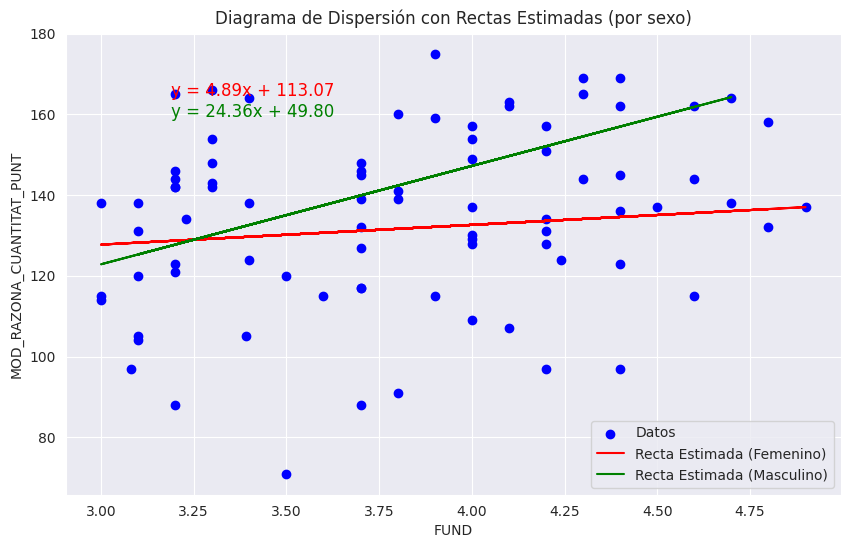

In [ ]:
# @title **26.  Dibujame grafico de dispersion las dos rectas estimadas y su ecuacion**

# Crear el diagrama de dispersión con las dos rectas estimadas
plt.figure(figsize=(10, 6))
plt.scatter(df_datos['FUND'], df_datos['MOD_RAZONA_CUANTITAT_PUNT'], color='blue', label='Datos')

# Dibujar la recta estimada para el sexo femenino
df_femenino = df_datos[df_datos['ESTU_GENERO'] == 'F']
X_femenino = df_femenino['FUND'].values.reshape(-1, 1)
Y_femenino = df_femenino['MOD_RAZONA_CUANTITAT_PUNT'].values
reg_femenino = LinearRegression().fit(X_femenino, Y_femenino)
Y_pred_femenino = reg_femenino.predict(X_femenino)
plt.plot(X_femenino, Y_pred_femenino, color='red', label='Recta Estimada (Femenino)')

# Dibujar la recta estimada para el sexo masculino
df_masculino = df_datos[df_datos['ESTU_GENERO'] == 'M']
X_masculino = df_masculino['FUND'].values.reshape(-1, 1)
Y_masculino = df_masculino['MOD_RAZONA_CUANTITAT_PUNT'].values
reg_masculino = LinearRegression().fit(X_masculino, Y_masculino)
Y_pred_masculino = reg_masculino.predict(X_masculino)
plt.plot(X_masculino, Y_pred_masculino, color='green', label='Recta Estimada (Masculino)')


# Obtener la ecuación de la recta estimada para femenino
pendiente_femenino = reg_femenino.coef_[0]
intercepto_femenino = reg_femenino.intercept_
ecuacion_femenino = f'y = {pendiente_femenino:.2f}x + {intercepto_femenino:.2f}'
plt.text(min(df_datos['FUND']) + 0.1*(max(df_datos['FUND'])-min(df_datos['FUND'])), max(df_datos['MOD_RAZONA_CUANTITAT_PUNT'])-0.1*(max(df_datos['MOD_RAZONA_CUANTITAT_PUNT'])-min(df_datos['MOD_RAZONA_CUANTITAT_PUNT'])), ecuacion_femenino, fontsize=12, color='red')


# Obtener la ecuación de la recta estimada para masculino
pendiente_masculino = reg_masculino.coef_[0]
intercepto_masculino = reg_masculino.intercept_
ecuacion_masculino = f'y = {pendiente_masculino:.2f}x + {intercepto_masculino:.2f}'
plt.text(min(df_datos['FUND']) + 0.1*(max(df_datos['FUND'])-min(df_datos['FUND'])), max(df_datos['MOD_RAZONA_CUANTITAT_PUNT'])-0.15*(max(df_datos['MOD_RAZONA_CUANTITAT_PUNT'])-min(df_datos['MOD_RAZONA_CUANTITAT_PUNT'])), ecuacion_masculino, fontsize=12, color='green')




# Etiquetas de los ejes y título
plt.xlabel('FUND')
plt.ylabel('MOD_RAZONA_CUANTITAT_PUNT')
plt.title('Diagrama de Dispersión con Rectas Estimadas (por sexo)')
plt.legend()
plt.show()

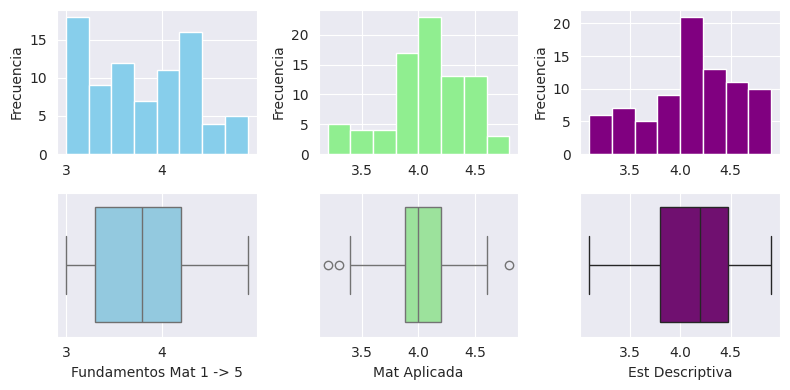

In [ ]:
# @title **Gráficas BoxPlot e Histograma**
plt.figure(figsize=(8, 4))

# Histograma FUND
plt.subplot(2, 3, 1)
plt.hist(df_datos['FUND'], bins=8, color='skyblue')
#plt.title('Distribución de las Definitivas')
#plt.xlabel('Definitiva (0->5)')
plt.ylabel('Frecuencia')

# Histograma de MAT_APLI
plt.subplot(2, 3, 2)
plt.hist(df_datos['MAT_APLI'], bins=8, color='lightgreen')
#plt.title('Distribución de Edad')
#plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia')

# Boxplot de las FUND
plt.subplot(2, 3, 4)
sns.boxplot(data=df_datos, x='FUND', color='skyblue')
#plt.title('Distribución de Notas Definitivas')
plt.xlabel('Fundamentos Mat 1 -> 5')

# Boxplot MAT_APLI
plt.subplot(2, 3, 5)
sns.boxplot(data=df_datos, x='MAT_APLI', color='lightgreen')
plt.xlabel('Mat Aplicada')
#plt.title('Distribución de Notas Definitivas')

# Histograma de la EST_desc
plt.subplot(2, 3, 3)
plt.hist(df_datos['EST_DESC'], bins=8, color='purple')
#plt.title('Distribución de Asistencia')
plt.ylabel('Frecuencia')
#plt.xlabel('Est Descriptiva')

# Boxplot de estatura
plt.subplot(2, 3, 6)
sns.boxplot(data=df_datos, x='EST_DESC', color='purple')
#plt.title('Distribución de la Asistencia')
plt.xlabel('Est Descriptiva')

#ajustar espaciado entre subplot
plt.tight_layout()
plt.show()


